In [32]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']

In [3]:
df_raw = pd.read_csv('final.csv')

# use 100 data only
# df_raw = df_raw.head(100)

df_raw = df_raw.set_index('datetime')

In [4]:
df_raw

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...
4/6/2021 08:00:00,42,986,328,771.720,7.638,16.896
4/6/2021 08:15:00,42,984,325,766.032,7.602,16.704
4/6/2021 08:30:00,42,986,328,765.216,7.638,16.704


# normalization min max

In [5]:
def minmax_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
    

In [6]:
df_normalized = df_raw.copy()
df_normalized[columns2] = minmax_normalize(df_normalized[columns2])

df_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.113730,0.479358
...,...,...,...,...,...,...
4/6/2021 08:00:00,1.0,0.650862,0.666667,0.569476,0.988046,0.256881
4/6/2021 08:15:00,1.0,0.642241,0.583333,0.549359,0.975751,0.252294
4/6/2021 08:30:00,1.0,0.650862,0.666667,0.546473,0.988046,0.252294


In [7]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def plot_rows(df, columns):
    fig, ax = plt.subplots(len(columns), 1, figsize=(10, 10))
    for i, column in enumerate(columns):
        ax[i].plot(df.index, df[column])
        # reduce x label
        ax[i].set_xticks(ax[i].get_xticks()[::30])
        ax[i].set_title(column)
    plt.show()

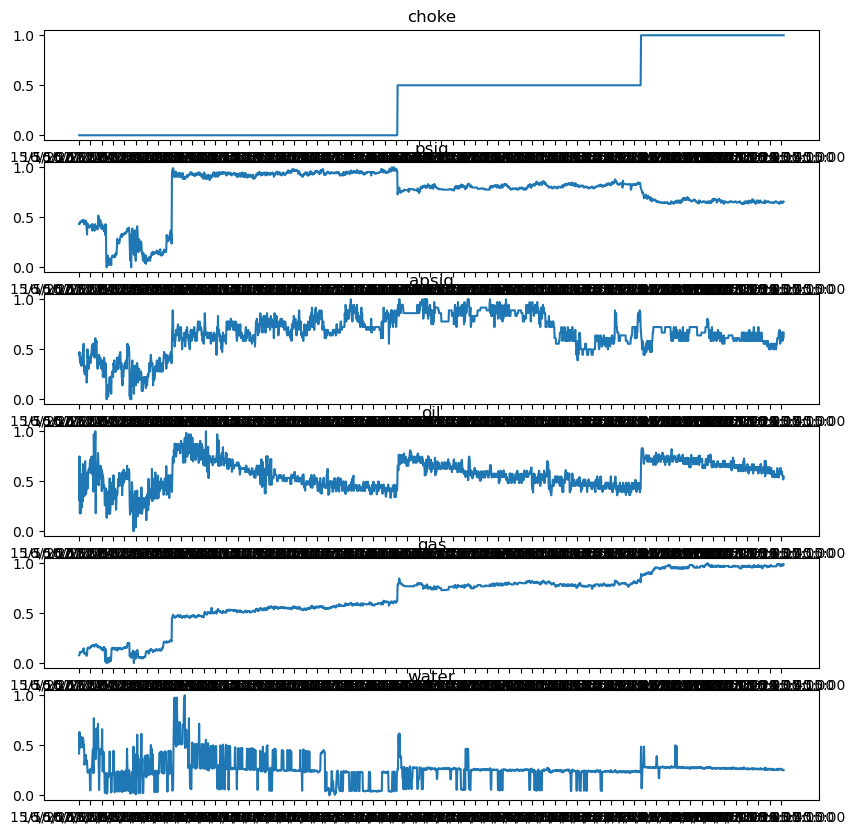

In [9]:
plot_rows(df_normalized, columns2)

# Reference
- https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2
- https://bobrupakroy.medium.com/multivariate-multistep-lstm-38d9536a6b2e

![lstm_model](lstm_model.png)


In [31]:
# get choke 38 only
df_choke_38 = df_raw[df_raw['choke'] == 38].copy()
df_choke_38.head()

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [33]:
scaler = MinMaxScaler()

In [49]:
df_choke_38_normalized = scaler.fit_transform(df_choke_38)
df_choke_38_normalized = pd.DataFrame(df_choke_38_normalized, columns=columns2)
df_choke_38_normalized['datetime'] = df_choke_38.index
df_choke_38_normalized = df_choke_38_normalized.set_index('datetime')
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [12]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
# sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)
# tanh
def tanh(x):
    return math.tanh(x)
# tanh derivative
def tanh_derivative(x):
    return 1.0 - x**2

In [71]:
# create simple LSTM cell no function and class
def simple_lstm_cell(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    """
    Implements a simple LSTM cell.

    Args:
        inputs (ndarray): Input array of shape (batch_size, input_size).
        h (ndarray): Hidden state array of shape (batch_size, hidden_size).
        c (ndarray): Cell state array of shape (batch_size, hidden_size).
        Wf (ndarray): Weight matrix for the forget gate of shape (input_size, hidden_size).
        Wi (ndarray): Weight matrix for the input gate of shape (input_size, hidden_size).
        Wc (ndarray): Weight matrix for the cell state of shape (input_size, hidden_size).
        Wo (ndarray): Weight matrix for the output gate of shape (input_size, hidden_size).
        bf (ndarray): Bias vector for the forget gate of shape (hidden_size,).
        bi (ndarray): Bias vector for the input gate of shape (hidden_size,).
        bc (ndarray): Bias vector for the cell state of shape (hidden_size,).
        bo (ndarray): Bias vector for the output gate of shape (hidden_size,).

    Returns:
        tuple: A tuple containing the updated hidden state (h) and cell state (c) arrays.
    """
    f = sigmoid(np.dot(inputs, Wf) + np.dot(h, bf))
    i = sigmoid(np.dot(inputs, Wi) + np.dot(h, bi))
    c_tilda = tanh(np.dot(inputs, Wc) + np.dot(h, bc))
    c = f * c + i * c_tilda
    o = sigmoid(np.dot(inputs, Wo) + np.dot(h, bo))
    h = o * tanh(c)
    return h, c

array([0.25168773, 0.40035212])

In [116]:

cell = pd.DataFrame([], columns=['hidden state', 'cell state'])
# use function above
cell0 = simple_lstm_cell(
    df_choke_38_normalized.iloc[0].values,
    0,
    0,
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)

# create function to simplify code above line 19 and 22
def cell_append(self, new_cell):
    new_cell = pd.DataFrame([new_cell], columns=['hidden state', 'cell state'])
    return pd.concat([self, new_cell], ignore_index=True)
# append the first cell to the cell DataFrame
cell = cell_append(cell, cell0)

# print the updated cell DataFrame
cell

/tmp/ipykernel_13867/1477808862.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([self, new_cell], ignore_index=True)


,hidden state,cell state
0,0.360663,0.525282


In [117]:
# cell 1
cell1 = simple_lstm_cell(
    df_choke_38_normalized.iloc[1].values,
    cell[['hidden state']].iloc[0].values[0],
    cell[['cell state']].iloc[0].values[0],
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)
# cell1
# # append the second cell to the cell DataFrame
cell = cell_append(cell, cell1)
cell

,hidden state,cell state
0,0.360663,0.525282
1,0.597457,1.195334


In [118]:
# what the result of that LSTM cell

#  create loop 
for i in range(2, len(df_choke_38_normalized)):
    new_cell = simple_lstm_cell(
        df_choke_38_normalized.iloc[i].values,
        cell[['hidden state']].iloc[-1].values[0],
        cell[['cell state']].iloc[-1].values[0],
        np.random.rand(6, 1),
        np.random.rand(6, 1),
        np.random.rand(6, 1),
        np.random.rand(6, 1),
        np.random.rand(1, 1),
        np.random.rand(1, 1),
        np.random.rand(1, 1),
        np.random.rand(1, 1)
    )
    cell = cell_append(cell, new_cell)
    

In [127]:
# create neural network from that LSTM cell
def simple_lstm(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states

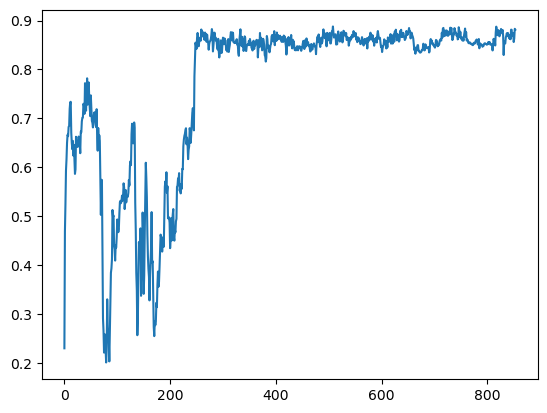

In [130]:
# use that function
hidden_states = simple_lstm(
    df_choke_38_normalized,
    0,
    0,
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)
# plot the hidden states
plt.plot(hidden_states)

In [132]:
# unroll prediction
def simple_lstm_unroll(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states, h, c

In [136]:
lstm_unroll = simple_lstm_unroll(
    df_choke_38_normalized.values,
    0,
    0,
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(6, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1),
    np.random.rand(1, 1)
)
print(lstm_unroll)

([0.31501731963590346, 0.6220742905768943, 0.6954664339264028, 0.7605110120666794, 0.7698432009930529, 0.7931207876408765, 0.8022059290069383, 0.7888083123001315, 0.8050815779977682, 0.803276365540008, 0.8322688549833416, 0.835874469459314, 0.8296044727329729, 0.7840104935196545, 0.7776880597373178, 0.7760797145926424, 0.7980892310459117, 0.7721109111660922, 0.7864303928327628, 0.7725225081663706, 0.7529096682745587, 0.7632848232636289, 0.8183906265745783, 0.7996981814323936, 0.8043704531796132, 0.7945805236820854, 0.8006670042392272, 0.8084542643186367, 0.8039411532399445, 0.8119483686280135, 0.7952824814013946, 0.8206577354037277, 0.8144166624683291, 0.8293803755701217, 0.8282641417435144, 0.8208418106819297, 0.8339334417631731, 0.8295188653875362, 0.8150776493728937, 0.8563943047444117, 0.8270576215363273, 0.8099647219659691, 0.8433593786305003, 0.866462755295792, 0.8081230831948937, 0.8337350234064733, 0.8459655796241669, 0.8188973832952947, 0.8126177633097705, 0.8008558294967322, 

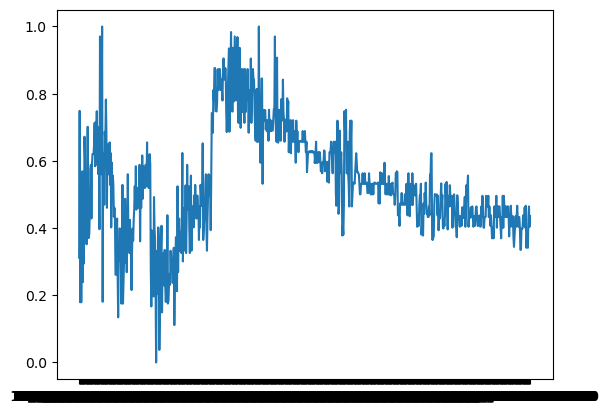

In [137]:
# plot
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

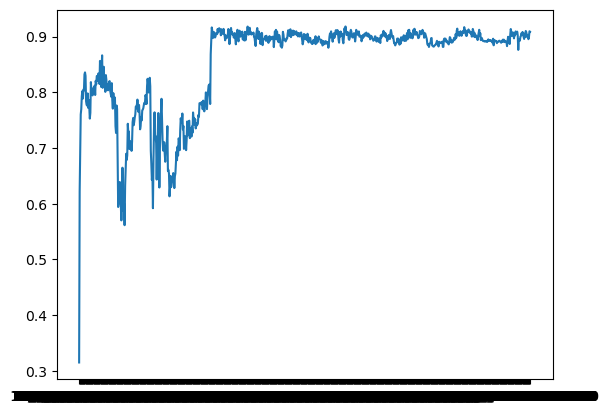

In [148]:
# plot
plt.plot(df_choke_38_normalized.index, lstm_unroll[0], label='Predicted')